## Inicializacion de variables y datos

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_fallecidos = pd.read_csv('./../data/fallecidos_covid.csv',encoding =('ISO-8859-1'),low_memory =False)
df_fallecidos.head()

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,a3f91b4893446f471ec1c079f28ba20b,20200602,1,MASCULINO,20190205.0,LIMA,LIMA,LA VICTORIA
1,8960c1b9f3c9289271b41c4a7c0d33f6,20200602,41,MASCULINO,19780811.0,LIMA,LIMA,VILLA EL SALVADOR
2,36497739152c2ae26703c1eca9acf537,20200602,72,MASCULINO,19471001.0,ANCASH,SANTA,NUEVO CHIMBOTE
3,627171bd69f18c257468bca6cb0aeff0,20200602,49,MASCULINO,19700910.0,ANCASH,SANTA,CHIMBOTE
4,2b20dcb481a39590c87752156e2a9e32,20200602,26,MASCULINO,19931017.0,LIMA,LIMA,LOS OLIVOS


In [28]:
df_positivos = pd.read_csv('./../data/positivos_covid.csv',encoding =('ISO-8859-1'),low_memory =False)
df_positivos.head()

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,47.0,MASCULINO,20200615
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,PCR,15.0,FEMENINO,20200615
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,PCR,88.0,MASCULINO,20200615
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,PCR,73.0,MASCULINO,20200615
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,PCR,4.0,FEMENINO,20200615


## Conocimiento de los datasets

In [29]:
df_positivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549321 entries, 0 to 549320
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UUID             549321 non-null  object 
 1   DEPARTAMENTO     549321 non-null  object 
 2   PROVINCIA        549321 non-null  object 
 3   DISTRITO         549321 non-null  object 
 4   METODODX         549321 non-null  object 
 5   EDAD             549247 non-null  float64
 6   SEXO             549321 non-null  object 
 7   FECHA_RESULTADO  549321 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 33.5+ MB


In [30]:
df_fallecidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26658 entries, 0 to 26657
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UUID                 26658 non-null  object 
 1   FECHA_FALLECIMIENTO  26658 non-null  int64  
 2   EDAD_DECLARADA       26658 non-null  int64  
 3   SEXO                 26658 non-null  object 
 4   FECHA_NAC            25389 non-null  float64
 5   DEPARTAMENTO         26658 non-null  object 
 6   PROVINCIA            25379 non-null  object 
 7   DISTRITO             25909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB


# 1. Analisis de los datos 

### A) Promedio de edad de contagio por departamento

In [102]:
#Promedio de edad de contagio por departamento

depa_edad = df_positivos.groupby('DEPARTAMENTO').mean().reset_index()
depa_edad = depa_edad[['DEPARTAMENTO','EDAD']]
depa_edad

,DEPARTAMENTO,EDAD
0,AMAZONAS,39.337232
1,ANCASH,43.391382
2,APURIMAC,39.718933
3,AREQUIPA,44.973357
4,AYACUCHO,43.215935
5,CAJAMARCA,41.546051
6,CALLAO,44.756073
7,CUSCO,42.613529
8,HUANCAVELICA,37.990654
9,HUANUCO,41.886005


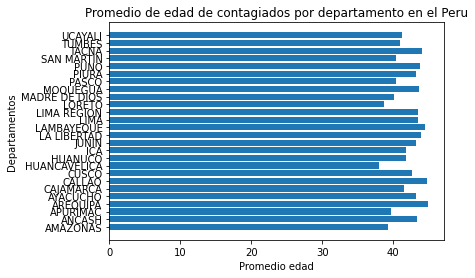

In [125]:
# Grafico de los datos obtenidos

plt.title("Promedio de edad de contagiados por departamento en el Peru")
plt.ylabel("Departamentos")
plt.xlabel("Promedio edad")

plt.barh(depa_edad['DEPARTAMENTO'], depa_edad['EDAD'])
plt.show()

### B) Contagiados por genero

In [104]:
#Obteniendo la cantidad de contagiados por genero

contador_gen = df_positivos.groupby(['SEXO']).count().reset_index()

columnas_borrar = ['UUID','DEPARTAMENTO','PROVINCIA', 'DISTRITO', 'METODODX', 'FECHA_RESULTADO']

contador_gen = contador_gen.drop(columns = columnas_borrar) 

contador_gen = contador_gen.rename(columns={'EDAD':'CANTIDAD'})

contador_gen

,SEXO,CANTIDAD
0,FEMENINO,248490
1,MASCULINO,300757


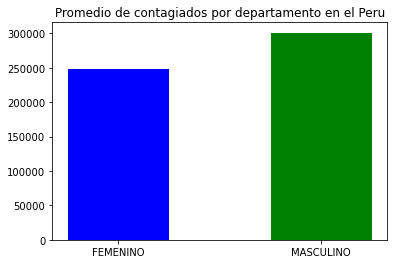

In [124]:
plt.title("Promedio de contagiados por departamento en el Peru")

plt.bar(contador_gen['SEXO'], contador_gen['CANTIDAD'], 0.5, color = ['blue', 'green'])

plt.show()

### C) Contagio por edad

In [131]:
contagio_edad = df_positivos.groupby(['EDAD']).count().reset_index()

contagio_edad['CANT_CONTAGIADOS'] = contagio_edad['PROVINCIA']

columnas_borrar = ['UUID','DEPARTAMENTO', 'DISTRITO', 'METODODX', 'FECHA_RESULTADO','PROVINCIA', 'SEXO']

contagio_edad = contagio_edad.drop(columns = columnas_borrar) 

contagio_edad

,EDAD,CANT_CONTAGIADOS
0,0.0,2675
1,1.0,1332
2,2.0,1040
3,3.0,979
4,4.0,1031
...,...,...
106,106.0,2
107,107.0,1
108,108.0,1
109,115.0,1


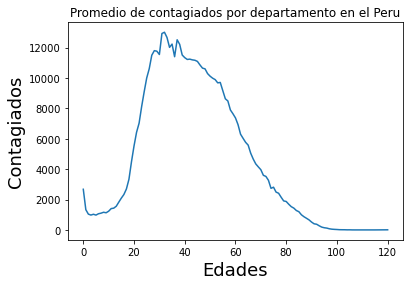

In [138]:
plt.title("Promedio de contagiados por departamento en el Peru")

plt.xlabel("Edades", size = 18)
plt.ylabel("Contagiados", size = 18)
plt.plot(contagio_edad['EDAD'], contagio_edad['CANT_CONTAGIADOS'])
plt.show()